<div class="alert alert-block alert-success">
<h1>Number Cross</h1>
<h4>AUGUST 2014: PUZZLE</h4>
</div>

<img src="https://www.janestreet.com/puzzles/number_crossword_with_clues.png" width=720 height=35 />

The puzzle was publised at https://www.janestreet.com/puzzles/number-cross-index/

Place the digits 1 through 9 (no zeros) in the crossword grid below so that all of the clues are satisfied. No digit is repeated in any one grid entry (e.g. 1-across is a grid entry), and no grid entry is used more than once within the puzzle.

For your answer, submit the sum of the 8 5-digit grid entries in the completed grid (e.g. 4-down, 18-across, etc.)

<div class="alert alert-block alert-warning">
    <h1>Break down the problem</h1>
</div>

In this puzzle, you are given a crossword grid with clues. The grid contains 11 rows and 11 columns, and you need to:

**Requirements**

* Place the digits 1 through 9 (without using any zeros) into the grid so that all of the provided clues are satisfied.

* Fill in the grid entries with the appropriate digits while ensuring that: 
    * No digit is repeated within any single grid entry (e.g., 322 cannot be the answer because there are two number 2s). 
    * No grid entry is used more than once within the puzzle (e.g., there could not be two numbers 325 appearing in the puzzle).

**Submission**

Once you've successfully filled in the grid and satisfied all the clues, find and sum the **5-digit numbers** formed by the rows, columns (e.g. 4-down, 18-across, etc.) and submit your answer.

<div class="alert alert-info">
  <h1>Solution</h1>
</div>

In [42]:
import numpy as np
import time
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown
from z3 import *

## Create a 11x11 grid as the question

In [43]:
# The filled cell will be 0, while the blank cell will be 1
grid = np.array([[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                 [1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
                 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                 [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1],
                 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
                 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]
                ],dtype=int)

## Set up utility functions

In [44]:
# Utility functions
def mult(x):
    """
    Create the digit number for the grid entry
    
    Parameters:
    x: an array of variables
    
    Return: a digit (e.g. 3,2,5 => 325)
    """
    n=len(x)
    return Sum([x[i] *10**((n-1)-i)  for i in range(n)]) 

def sum_dig(x):
    """
    Sum all digits in the grid entry
    
    Parameters:
    x: an array of digits
    
    Return: a sum of all digits
    """
    return Sum([i for i in x])

def make_across(x,y,n):
    """
    Create the variables for the grid entry
    
    Parameters:
    x: the rows' positions.
    y: the columns' positions.
    n: the number of digit needs to be entered.
    
    Return: an array contain variables for a grid entry.
    """
    
    return [X[x][y+i] for i in range(n)]

def make_down(x,y,n):
    """
    Create the variables for the grid entry
    
    Parameters:
    x: the rows' positions.
    y: the columns' positions.
    n: the number of digit needs to be entered.
    
    Return: an array contain variables for a grid entry.
    """
    return [X[x+i][y] for i in range(n)]

## Set up solver and matrix

In [45]:
# Setup a 11x11 matrix of integer variables and solver 
X = np.array(IntVector("x",11*11),dtype=object).reshape((11,11))
s = Tactic("pqffd").solver()

## Cell conditions

In [46]:
# each non-black cell contains a value in {1, ..., 9} black cells = 0
s += [And(e>0,e<=9) if grid[i,j] !=1 else e==0 for (i,j),e in np.ndenumerate(X)]

## Set up the clues

In [47]:
across = {}
across[1]  = make_across(0,0,3)
across[4]  = make_across(0,4,3)
across[7]  = make_across(0,8,3)
across[10] = make_across(1,0,3)
across[11] = make_across(1,4,3)
across[12] = make_across(1,8,3)
across[13] = make_across(2,0,3)
across[14] = make_across(2,4,7)
across[16] = make_across(3,2,6)
across[18] = make_across(4,0,5)
across[20] = make_across(4,6,5)
across[24] = make_across(5,0,4)
across[25] = make_across(5,7,4)
across[26] = make_across(6,0,5)
across[28] = make_across(6,6,5)
across[29] = make_across(7,3,6)
across[31] = make_across(8,0,7)
across[34] = make_across(8,8,3)
across[37] = make_across(9,0,3)
across[38] = make_across(9,4,3)
across[39] = make_across(9,8,3)
across[40] = make_across(10,0,3)
across[41] = make_across(10,4,3)
across[42] = make_across(10,8,3)

down = {}
down[1] = make_down(0,0,3)
down[2] = make_down(0,1,3)
down[3] = make_down(0,2,7)
down[4] = make_down(0,4,5)
down[5] = make_down(0,5,4)
down[6] = make_down(0,6,5)
down[7] = make_down(0,8,3)
down[8] = make_down(0,9,3)
down[9] = make_down(0,10,3)
down[15] = make_down(2,7,6)
down[17] = make_down(3,3,6)
down[18] = make_down(4,0,3)
down[19] = make_down(4,1,3)
down[21] = make_down(4,8,7)
down[22] = make_down(4,9,3)
down[23] = make_down(4,10,3)
down[27] = make_down(6,4,5)
down[28] = make_down(6,6,5)
down[30] = make_down(7,5,4)
down[31] = make_down(8,0,3)
down[32] = make_down(8,1,3)
down[33] = make_down(8,2,3)
down[35] = make_down(8,9,3)
down[36] = make_down(8,10,3)

clues =[v for k,v in across.items()]+[v for k,v in down.items()]

## No grid entry is used more than once within the puzzle

In [48]:
# distinct clues
s += Distinct([mult(i) for i in clues])

## No digit is repeated within any single grid entry

In [49]:
# distinct digit in clues
s += [Distinct([x for x in i]) for i in clues]

## Solving the clues

### Squares
Example: A square number

In [50]:
#squares
# All "squares" questions requires a 3-digit number, 10 - 32 will create numbers from 100 to 961
square_numbers = [i**2 for i in range(10,32)] 
# "Squares" questions going across
sq_across = [1,4,7,11,12]
s += [Or([mult(across[i]) == x for x in square_numbers]) for i in sq_across]
# "Squares" questions going down
sq_down = [1,7,8,18,19,36]
s += [Or([mult(down[i]) == x for x in square_numbers]) for i in sq_down]

### Primes
Example: A prime number

Definition: a prime number cannot be evenly divided by any other number except for 1 and itself.

In [51]:
import sympy

For more information, please go to [sympy](https://docs.sympy.org/latest/tutorials/intro-tutorial/intro.html#)

In [52]:
#primes
# All "primes" questions requires a 3-digit number.
prime_numbers = [*sympy.primerange(100,1000)]
# "Primes" questions going across
pr_across = [39]
s += [Or([mult(across[i]) == x*2 for x in prime_numbers]) for i in pr_across]
# "Primes" questions going down
pr_down = [9,22]
s += [Or([mult(down[i]) == x for x in prime_numbers]) for i in pr_down]

### Other questions going across

In [53]:
# 10. Samller than 23-down
s += mult(across[10]) < mult(down[23])
# 13. The smallest number in this grid
s += And([mult(across[13]) <= mult(i) for i in clues])
# 14. Its digits sum to 42
s += sum_dig(across[14]) ==42
# 16. Divisible by 6
s += mult(across[16]) % 6 ==0
# 18. 37-across + 6-down
s += mult(across[18]) == (mult(across[37])+mult(down[6]))
# 20. Whether read forwards or backwards, the largest 5-digit number in this grid
s += And([And(mult(across[20]) >= mult(i),mult(across[20][::-1]) > mult(i)) for i in clues if len(i) == 5])
# 24. Has the same digits as 5-down
s += Or([And([across[24][i]==j[i] for i in range(4)]) for j in itertools.permutations(down[5],4)])
# 25. 42-across + 7-down
s += mult(across[25]) == (mult(across[42])+mult(down[7]))
# 26. Its digits sum to 26
s += sum_dig(across[26]) == 26
# 28. Its digits are ascending
s += And([across[28][i-1] < across[28][i] for i in range(1,len(across[28]))])
# 29. 4-across times 35-down
s += mult(across[29]) == (mult(across[4])*mult(down[35]))
# 31. Divisible by 3
s += mult(across[31]) % 3 ==0
# 34. Divisible by 3
s += mult(across[34]) % 3 ==0
# 37. Its digits are ascending
s += And([across[37][i-1] < across[37][i] for i in range(1,len(across[37]))])
# 38. 39-across minus 13-across
s += mult(across[38]) == (mult(across[39])-mult(across[13]))
# 40. Greater than 1-across
s += mult(across[40]) > mult(across[1])
# 41. Divisible by 25
s += mult(across[41]) % 25 ==0
# 42. An odd number
s += mult(across[42]) %  2 ==1

### Other questions going down

In [54]:
# 2. Divisible by 11
s += mult(down[2]) % 11 ==0
# 3. The largest number in this grid
s += And([mult(down[3]) >= mult(i) for i in clues])
# 4. Its digits sum to 16
s += sum_dig(down[4]) == 16
# 5. A multiple of 9-down
s += Or([mult(down[5]) * i  == mult(down[9]) for i in range(1,10)]+[mult(down[5]) == mult(down[9])*i for i in range(1,10)])
# 6. Its digits sum to 35
s += sum_dig(down[6]) == 35
# 15. Divisible by 11
s += mult(down[15]) % 11 ==0
# 17. Divisible by 9
s += mult(down[17]) % 9 ==0
# 21. Its digits sum to 41
s += sum_dig(down[21]) == 41
# 23. Larger than 32-down
s += mult(down[23]) > mult(down[32])
# 27. Half of 6-down
s += mult(down[27])*2 == mult(down[6])
# 28. Divisible by 125
s += mult(down[28]) % 125 ==0
# 30. Its digits are descending
s += And([down[30][i-1] > down[30][i] for i in range(1,len(down[30]))])
# 31. Its digits sum to 6
s += sum_dig(down[31]) == 6
# 32. A multiple of 31-down
s += Or([mult(down[32]) *i  == mult(down[31]) for i in range(1,10)]+[mult(down[32]) == mult(down[31])*i for i in range(1,10)])
# 33. A multiple of 31-down
s += Or([mult(down[33]) *i  == mult(down[31]) for i in range(1,10)]+[mult(down[33]) == mult(down[31])*i for i in range(1,10)])
# 35. An even number
s += mult(down[35]) % 2 ==0

## Solve and print the result

**Solution 407,358 found after 3.3507 seconds**

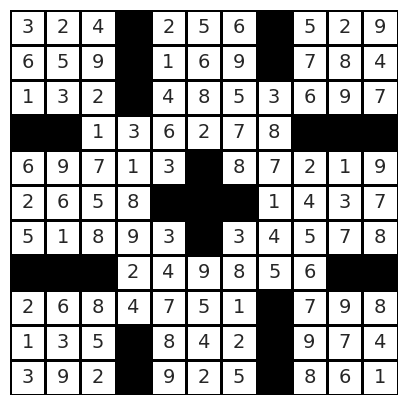

In [56]:
# Solve and print 
start = time.time()
if s.check() == sat:
    m = s.model()
    evalu = np.vectorize(lambda x:m.evaluate(x).as_long())
    r = evalu(X)
    display(Markdown("**Solution {:,.0f} found after {:.4f} seconds**".format(sum([mult(evalu(x)) for x in clues if len(x) ==5]),time.time()-start)))
    annot = r.astype('str')
    annot[annot=="0"] =""
    fig,ax = plt.subplots(1,1,figsize=(5,5))
    ax =sns.heatmap(grid,annot=annot,cbar=False,cmap="Greys",fmt="",linewidths=2,annot_kws={"size":14},linecolor='k')
    ax.axis("off")
    plt.show()
else:
    print("Failed") 

<div class="alert alert-info">
  <h1>Public Solution</h1>
</div>

<img src="https://www.janestreet.com/puzzles/Aug14_Solution.png" width=720 height=50 />

The BEST SOLUTION was publised at https://www.janestreet.com/puzzles/number-cross-solution/